In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report, classification_report


%matplotlib inline
plt.rcParams['font.size'] = 14


# DATA CLEANSING AND ANALYSIS
Let's first read in the df data as a dataframe "df" and inspect the first 5 rows

In [2]:
df = pd.read_excel("Dataset-A.xlsx", sheet_name= "Master1")
df.head()

,Module No,Name,Date,Time,Temperature[degC],Voltge Range[V],Current Range[A],Sampling Pitch[uS],Sensor,Caribration Constant (Er cal)[mV/kW/m^2],...,T (stc)[degC],Isc (stc)[A],Voc (stc)[V],Pm (stc)[W],Ipm (stc)[A],Vpm (stc)[V],Eta (stc)[%],FF(stc),Target1,Target2
0,2.019042e+16,MODULE,2019-04-18,14:27:18,51.475800,100,10,10,Pyranometer,52.49,...,25,8.125597,36.470915,256.619939,7.694155,33.352580,19.369710,0.692364,normal,normal
1,2.019042e+16,MODULE,2019-04-18,15:22:24,50.128021,100,10,10,Pyranometer,52.49,...,25,7.980039,36.864780,303.597866,9.234872,32.875156,19.641663,0.687003,normal,normal
2,2.019042e+16,MODULE,2019-04-18,12:42:08,59.767818,100,10,10,Pyranometer,52.49,...,25,8.211330,37.611504,232.034856,7.024377,33.032802,18.442858,0.654991,normal,normal
3,2.019042e+16,MODULE,2019-04-18,12:42:28,58.140396,100,10,10,Pyranometer,52.49,...,25,8.235223,37.360893,231.819756,7.041836,32.920355,18.695153,0.662300,normal,normal
4,2.019042e+16,MODULE,2019-04-18,12:41:26,59.235668,100,10,10,Pyranometer,52.49,...,25,8.213142,37.628963,233.798873,7.031283,33.251241,18.651410,0.661185,normal,normal


profile = ProfileReport(df)
profile

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 37 columns):
Module No                                    9 non-null float64
Name                                         212 non-null object
Date                                         212 non-null datetime64[ns]
Time                                         212 non-null object
Temperature[degC]                            212 non-null float64
Voltge Range[V]                              212 non-null int64
Current Range[A]                             212 non-null int64
Sampling Pitch[uS]                           212 non-null int64
Sensor                                       212 non-null object
Caribration Constant (Er cal)[mV/kW/m^2]     212 non-null float64
PV Device Area[m^2]                          212 non-null int64
Current Temp. Coef.[A/degC]                  212 non-null int64
Voltage Temp. Coef.[V/degC]                  212 non-null int64
Series Resistance(Rs)[ohm]                   21

In [4]:
df.isnull().sum()

Module No                                    203
Name                                           0
Date                                           0
Time                                           0
Temperature[degC]                              0
Voltge Range[V]                                0
Current Range[A]                               0
Sampling Pitch[uS]                             0
Sensor                                         0
Caribration Constant (Er cal)[mV/kW/m^2]       0
PV Device Area[m^2]                            0
Current Temp. Coef.[A/degC]                    0
Voltage Temp. Coef.[V/degC]                    0
Series Resistance(Rs)[ohm]                     0
Curve Correction Factor (Kappa)[ohm/degC]      0
Series Modules                                 0
Parallel Modules                               0
Solar Irradiance (Er)[W/m^2]                   0
PV Device Temp.[degC]                          0
Isc[A]                                         0
Voc[V]              

In [5]:
df1 = df[['Voc (stc)[V]','Isc (stc)[A]', 'Vpm (stc)[V]', 'Ipm (stc)[A]', 'Pm (stc)[W]','FF(stc)', 'FF', 'Target1', 'Target2']]
df1.head()

,Voc (stc)[V],Isc (stc)[A],Vpm (stc)[V],Ipm (stc)[A],Pm (stc)[W],FF(stc),FF,Target1,Target2
0,36.470915,8.125597,33.352580,7.694155,256.619939,0.692364,0.694345,normal,normal
1,36.864780,7.980039,32.875156,9.234872,303.597866,0.687003,0.695188,normal,normal
2,37.611504,8.211330,33.032802,7.024377,232.034856,0.654991,0.655067,normal,normal
3,37.360893,8.235223,32.920355,7.041836,231.819756,0.662300,0.663566,normal,normal
4,37.628963,8.213142,33.251241,7.031283,233.798873,0.661185,0.659496,normal,normal


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
Voc (stc)[V]    212 non-null float64
Isc (stc)[A]    212 non-null float64
Vpm (stc)[V]    212 non-null float64
Ipm (stc)[A]    212 non-null float64
Pm (stc)[W]     212 non-null float64
FF(stc)         212 non-null float64
FF              212 non-null float64
Target1         212 non-null object
Target2         212 non-null object
dtypes: float64(7), object(2)
memory usage: 15.0+ KB


In [7]:
df1.isnull().count()

Voc (stc)[V]    212
Isc (stc)[A]    212
Vpm (stc)[V]    212
Ipm (stc)[A]    212
Pm (stc)[W]     212
FF(stc)         212
FF              212
Target1         212
Target2         212
dtype: int64

In [8]:
df1['Voc'] = df1['Voc (stc)[V]']
df1['Isc'] = df1['Isc (stc)[A]']
df1['Vm'] = df1['Vpm (stc)[V]']
df1['Im'] = df1['Ipm (stc)[A]']
df1['Pmax'] = df1['Pm (stc)[W]']


C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [9]:
df1.head()

,Voc (stc)[V],Isc (stc)[A],Vpm (stc)[V],Ipm (stc)[A],Pm (stc)[W],FF(stc),FF,Target1,Target2,Voc,Isc,Vm,Im,Pmax
0,36.470915,8.125597,33.352580,7.694155,256.619939,0.692364,0.694345,normal,normal,36.470915,8.125597,33.352580,7.694155,256.619939
1,36.864780,7.980039,32.875156,9.234872,303.597866,0.687003,0.695188,normal,normal,36.864780,7.980039,32.875156,9.234872,303.597866
2,37.611504,8.211330,33.032802,7.024377,232.034856,0.654991,0.655067,normal,normal,37.611504,8.211330,33.032802,7.024377,232.034856
3,37.360893,8.235223,32.920355,7.041836,231.819756,0.662300,0.663566,normal,normal,37.360893,8.235223,32.920355,7.041836,231.819756
4,37.628963,8.213142,33.251241,7.031283,233.798873,0.661185,0.659496,normal,normal,37.628963,8.213142,33.251241,7.031283,233.798873


In [10]:
df1.columns

Index(['Voc (stc)[V]', 'Isc (stc)[A]', 'Vpm (stc)[V]', 'Ipm (stc)[A]',
       'Pm (stc)[W]', 'FF(stc)', 'FF', 'Target1', 'Target2', 'Voc', 'Isc',
       'Vm', 'Im', 'Pmax'],
      dtype='object')

In [11]:
df1 = df1[['Voc', 'Isc', 'Vm', 'Im', 'Pmax', 'FF(stc)', 'Target1', 'Target2']]
df1.head()

,Voc,Isc,Vm,Im,Pmax,FF(stc),Target1,Target2
0,36.470915,8.125597,33.352580,7.694155,256.619939,0.692364,normal,normal
1,36.864780,7.980039,32.875156,9.234872,303.597866,0.687003,normal,normal
2,37.611504,8.211330,33.032802,7.024377,232.034856,0.654991,normal,normal
3,37.360893,8.235223,32.920355,7.041836,231.819756,0.662300,normal,normal
4,37.628963,8.213142,33.251241,7.031283,233.798873,0.661185,normal,normal


In [12]:
df1.drop_duplicates()

,Voc,Isc,Vm,Im,Pmax,FF(stc),Target1,Target2
0,36.470915,8.125597,33.352580,7.694155,256.619939,0.692364,normal,normal
1,36.864780,7.980039,32.875156,9.234872,303.597866,0.687003,normal,normal
2,37.611504,8.211330,33.032802,7.024377,232.034856,0.654991,normal,normal
3,37.360893,8.235223,32.920355,7.041836,231.819756,0.662300,normal,normal
4,37.628963,8.213142,33.251241,7.031283,233.798873,0.661185,normal,normal
5,36.815545,8.172434,32.164327,8.007211,257.546549,0.685053,normal,normal
6,36.614084,8.180732,32.848986,7.842315,257.612080,0.682281,normal,normal
7,36.678072,8.127643,32.413718,7.869507,255.079987,0.684947,normal,normal
8,37.085668,8.145352,31.783963,8.945859,284.334842,0.671647,normal,normal
10,36.843003,8.193805,32.244558,7.739158,249.545732,0.678566,normal,normal


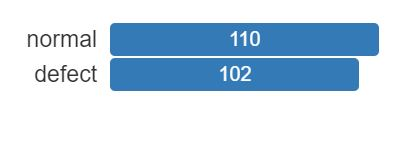

In [13]:
from IPython.display import Image
Image( "Ratio of normal and defect solar panels.jpg", width=500, height=500)

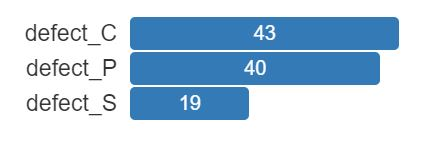

In [14]:
Image( "Defect wise category.jpg", width=500, height=500)

# Pairplot Visualisation


C:\Users\RetailAdmin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


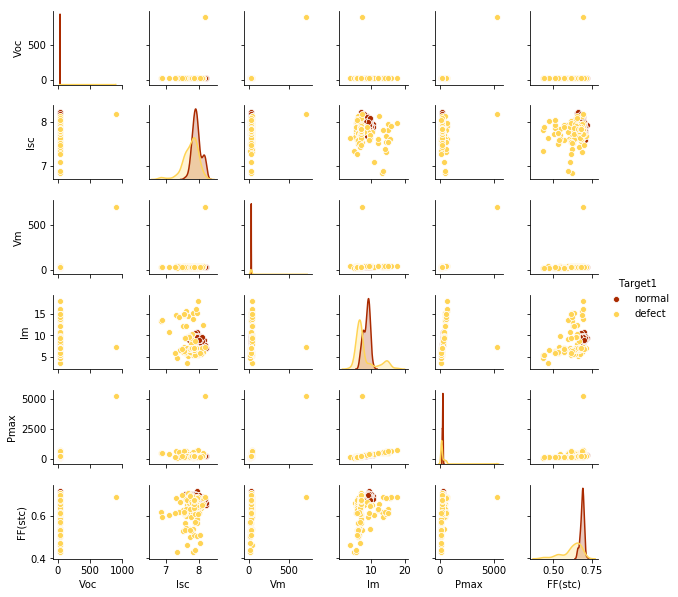

In [15]:
sns.pairplot(df1[['Voc', 'Isc', 'Vm', 'Im', 'Pmax', 'FF(stc)', 'Target1']], hue='Target1', palette='afmhot',size=1.4)

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


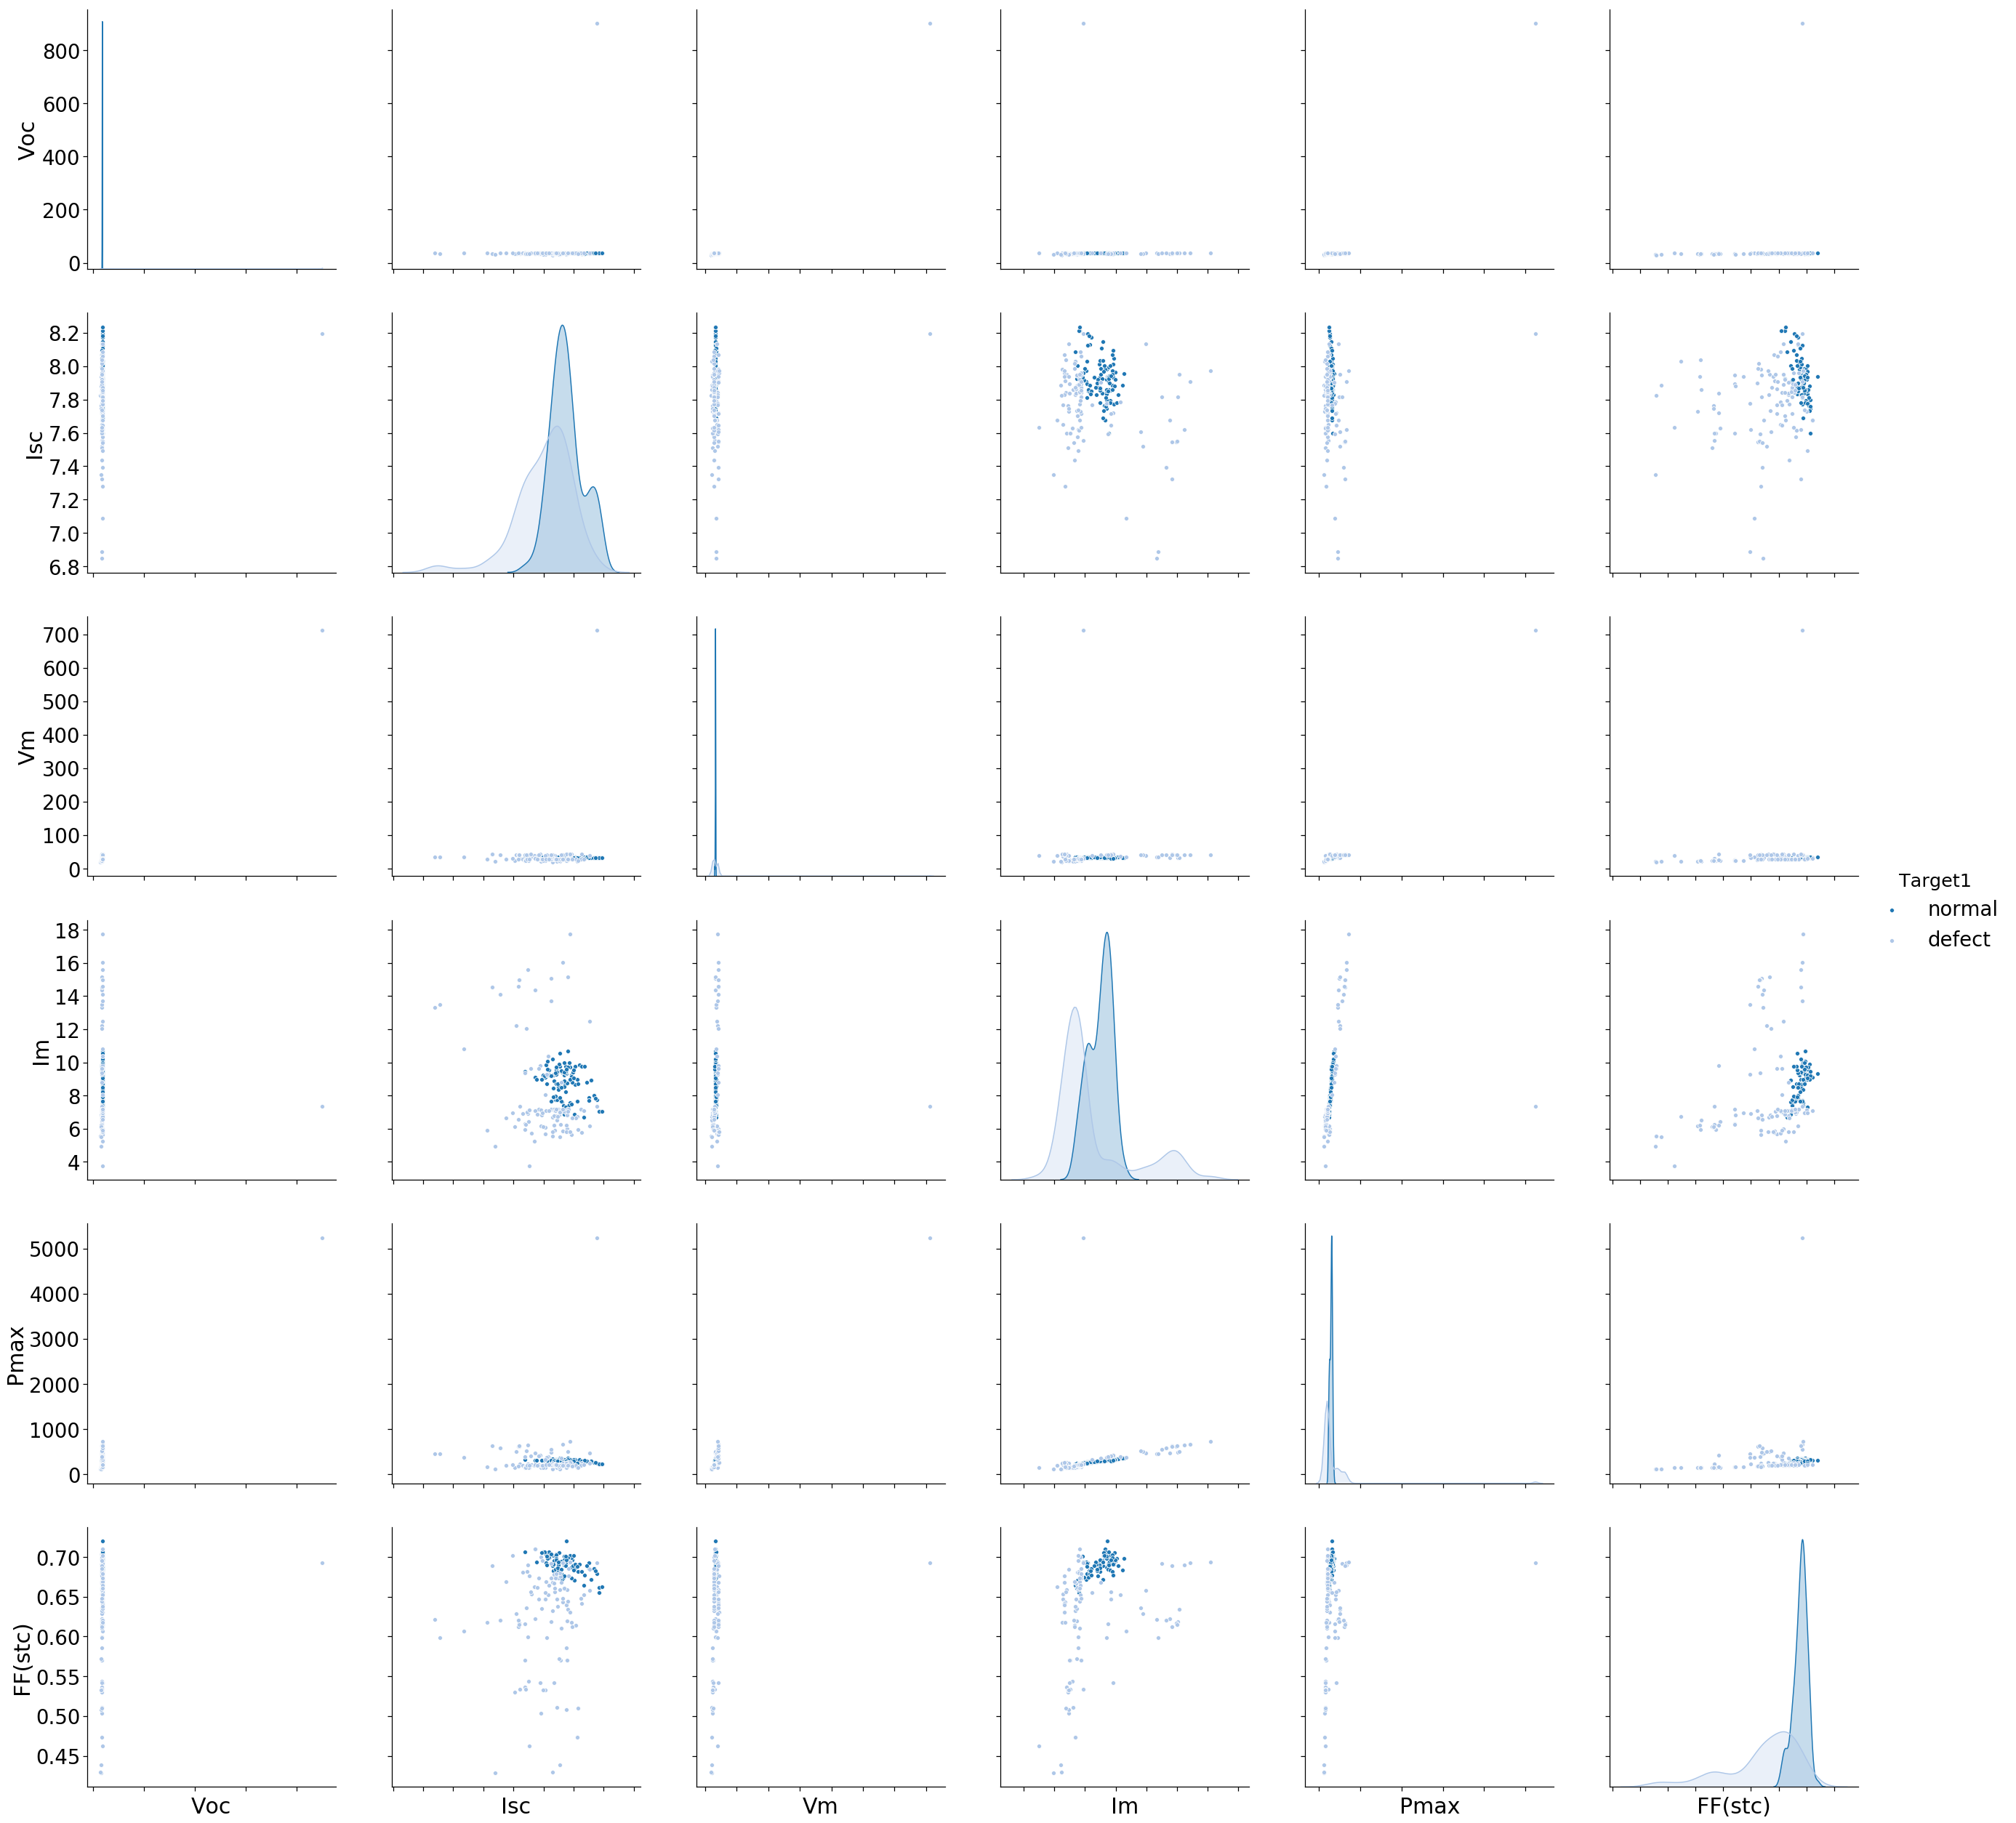

In [16]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df1[['Voc', 'Isc', 'Vm', 'Im', 'Pmax', 'FF(stc)', 'Target1']], hue='Target1', palette='tab20',size=6)
g.set(xticklabels=[]);

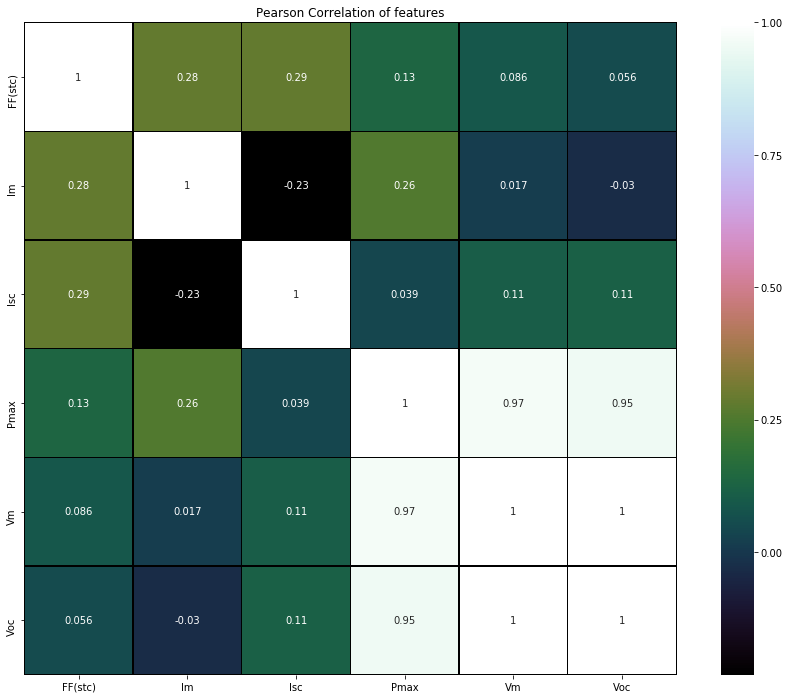

In [17]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df1.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df1[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [18]:
# Pmax is highly correlated with Vm and Im 
df1 = df1.drop(['Vm', 'Im'], axis=1) 

In [19]:
df1.columns

Index(['Voc', 'Isc', 'Pmax', 'FF(stc)', 'Target1', 'Target2'], dtype='object')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
Voc        212 non-null float64
Isc        212 non-null float64
Pmax       212 non-null float64
FF(stc)    212 non-null float64
Target1    212 non-null object
Target2    212 non-null object
dtypes: float64(4), object(2)
memory usage: 10.0+ KB


In [21]:
# Replace the value of Target1 and Target2
df1.Target1.replace({'normal': 0, 'defect': 1}, inplace = True)
df1.Target2.replace({'normal': 0, 'defect_C': 1, 'defect_P': 2, 'defect_S': 3}, inplace = True)

# Significant variables


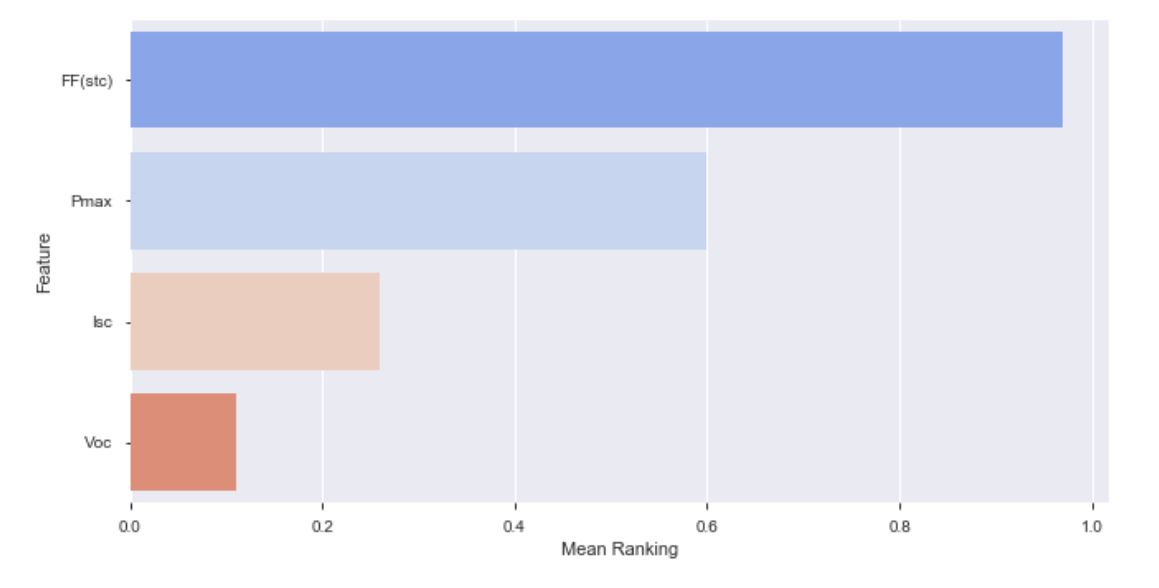

In [22]:
Image( "significant variables.jpg", width=500, height=500)

# Model Building

In [23]:
# Extract the input variable and target variable
X = df1[['Voc', 'Isc', 'Pmax', 'FF(stc)']]

y = df1['Target1']


In [24]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn import metrics

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy_score is: 0.828125
Logistic Regression confusion_matrix is: 



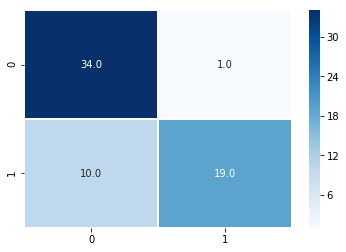

In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
print("Logistic Regression accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
print("Logistic Regression confusion_matrix is: \n")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells


Decision Tree Classifier accuracy_score is: 0.953125
Decision Tree Classifier confusion_matrix is: 



[Text(0, 0.5, 'normal'), Text(0, 1.5, 'defect')]

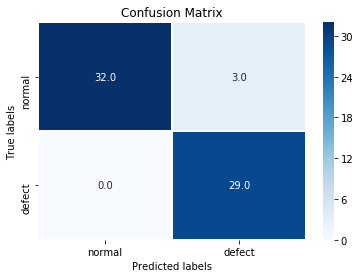

In [27]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)
print("Decision Tree Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
print("Decision Tree Classifier confusion_matrix is: \n")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'defect']); ax.yaxis.set_ticklabels(['normal', 'defect'])

Random Forest Classifier accuracy_score is: 1.0
Random Forest Classifier accuracy_score is: 1.0
Random Forest Classifier accuracy_score is: 1.0
Random Forest Classifier accuracy_score is: 1.0
Random Forest Classifier confusion_matrix is: 



[Text(0, 0.5, 'normal'), Text(0, 1.5, 'defect')]

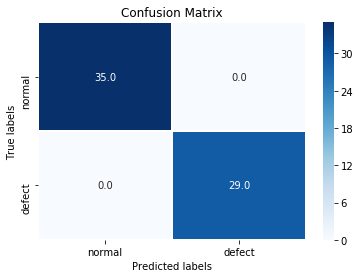

In [28]:
# Random Forest Classifier
dt = RandomForestClassifier(n_estimators = 21, random_state=40)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print("Random Forest Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))
print("Random Forest Classifier accuracy_score is:", metrics.precision_score(y_test, y_test_pred))
print("Random Forest Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))
print("Random Forest Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
print("Random Forest Classifier confusion_matrix is: \n")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'defect']); ax.yaxis.set_ticklabels(['normal', 'defect'])


K-Neighbors Classifier accuracy_score is: 0.921875
K-Neighbors Classifier confusion_matrix is: 



[Text(0, 0.5, 'normal'), Text(0, 1.5, 'defect')]

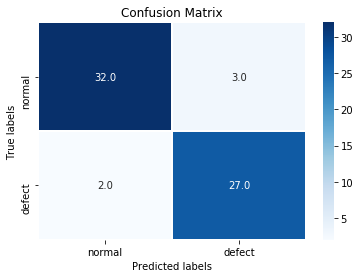

In [29]:
# K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print("K-Neighbors Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
print("K-Neighbors Classifier confusion_matrix is: \n")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'defect']); ax.yaxis.set_ticklabels(['normal', 'defect'])


In [30]:
df1.head()

,Voc,Isc,Pmax,FF(stc),Target1,Target2
0,36.470915,8.125597,256.619939,0.692364,0,0
1,36.864780,7.980039,303.597866,0.687003,0,0
2,37.611504,8.211330,232.034856,0.654991,0,0
3,37.360893,8.235223,231.819756,0.662300,0,0
4,37.628963,8.213142,233.798873,0.661185,0,0


In [31]:
# Get names of indexes for which column Target2 has value normal
indexNames = df1[df1['Target2'] == 0].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)


In [32]:
df1.Target2.unique()

array([1, 2, 3], dtype=int64)

In [33]:
# Extract the input variable and target variable
X = df1[['Voc', 'Isc', 'Pmax', 'FF(stc)']]

y = df1['Target2']

In [34]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Classifier accuracy_score is: 0.8709677419354839
Random Forest Classifier confusion_matrix is: 



[Text(0, 0.5, 'defect_C'), Text(0, 1.5, 'defect_P'), Text(0, 2.5, 'defect_S')]

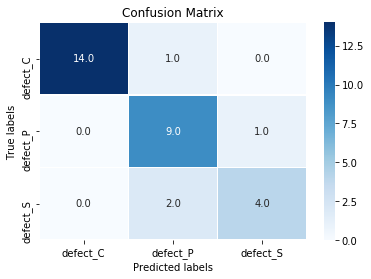

In [35]:
# Random Forest Classifier
dt = RandomForestClassifier(n_estimators = 21, random_state=40)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print("Random Forest Classifier accuracy_score is:", metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
print("Random Forest Classifier confusion_matrix is: \n")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['defect_C', 'defect_P', 'defect_S']); ax.yaxis.set_ticklabels(['defect_C', 'defect_P', 'defect_S'])


# df1.Target2.replace({'normal': 0, 'defect_C': 1, 'defect_P': 2, 'defect_S': 3}, inplace = True)

# Conclusion: 

The results as per the Accuracy for Logistic Regression, Decision Tree, Random Forest and K-Nearest Neighbor classifiers are 82.81%, 95.31%, 100.% and 92.18%.

The comparative results show that Random Forest classifiers perform excellent than Logistic Regression, Decision Tree and K-Nearest Neighbor. 

Furthermore, Random Forest classifiers model is used to predict the various types of defects like defect_C, defect_P and defect_S of a solar panel.